## Context

Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.


One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

### How can you help here?

The company wants to know:

• Which variables are significant in predicting the reason for hospitalization for different regions

• How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

### Column Profiling

- Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex: This is the policy holder's gender, either male or female
- Viral Load: Viral load refers to the amount of virus in an infected person's blood
- Severity Level: This is an integer indicating how severe the patient is
- Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.
- Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest
- Hospitalization charges: Individual medical costs billed to health insurance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Importing the Dataset
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv')
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [3]:
#Dropping the first column
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


- "Hospitalization Charges" is the dependant variable.
- All other columns are independent variables.

In [4]:
#Checking the shape of the dataset
df.shape
#There are 1338 rows and 7 columns.

(1338, 7)

In [5]:
#Checking the data types of the different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [6]:
#Checking for null values
df.isna().sum()
#There are no missing values.

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [7]:
#Checking data type and number of unique values of "age" columns
print(df['age'].dtype,df['age'].nunique())

int64 47


In [8]:
#Checking data type and number of unique values of "sex" columns
print(df['sex'].dtype,df['sex'].nunique())

object 2


In [9]:
#Checking data type and number of unique values of "smoker" columns
print(df['smoker'].dtype,df['smoker'].nunique())

object 2


In [10]:
#Checking data type and number of unique values of "region" columns
print(df['region'].dtype,df['region'].nunique())

object 4


In [11]:
#Checking data type and number of unique values of "viral load" columns
print(df['viral load'].dtype,df['viral load'].nunique())

float64 462


In [12]:
#Checking data type and number of unique values of "severity level" columns
print(df['severity level'].dtype,df['severity level'].nunique())

#This is actually a categorical data, but the data type is integer. Therefore changing it to object data type.
df['severity level']=df['severity level'].astype('object')

#Checking for updated data type
print(df['severity level'].dtype)

int64 6
object


In [13]:
#Checking data type and number of unique values of "hospitalization charges" columns
print(df['hospitalization charges'].dtype,df['hospitalization charges'].nunique())

int64 1320


In [14]:
#Checking the statistical summary of numerical columns
df.describe(include='number')

,age,viral load,hospitalization charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,33176.058296
std,14.049960,2.032796,30275.029296
min,18.000000,5.320000,2805.000000
25%,27.000000,8.762500,11851.000000
50%,39.000000,10.130000,23455.000000
75%,51.000000,11.567500,41599.500000
max,64.000000,17.710000,159426.000000


From the statisitical summary of numerical columns, we observe that :
- The mean and median age of the people in the given dataset is almost the same. The youngest person is 18 years old, and the eldest person is 64 years old.
- The mean and median viral load of the people in the given dataset is almost the same. The minimum viral load in a person is 5.32 and the maximum viral load in a person is 17.71.
- The mean hospitalization charges is a lot more than the median hospitalization charges. May be the hospitalization charges column is right skewed. The least hospitalization charges that any person has spent is 2805 and maximum is 159426.

In [15]:
#Checking the statistical summary of object columns
df.describe(include='object')

,sex,smoker,region,severity level
count,1338,1338,1338,1338
unique,2,2,4,6
top,male,no,southeast,0
freq,676,1064,364,574


From the statisitical summary of categorical columns, we observe that :
- Sex column has 2 unique values, and the most occuring value is "male" which occured 676 times.
- Smoker column has 2 unique values, and the most occuring value is "no" which occured 1064 times.
- Region column has 4 unique values, and the most occuring value is "southeast" which occured 364 times.
- Severity Level column has 6 unique values, and the most occuring value is "0" which occured 574 times.

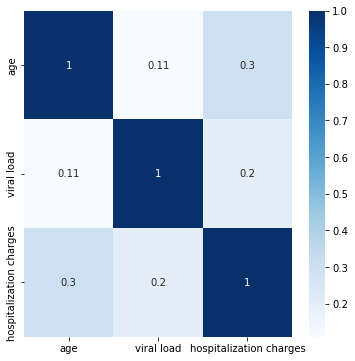

In [16]:
#Checking the correlation between the different columns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()
#We observe that the highest correlation is between age and hospitalization charge, but a correlation of 0.3 is still weak.

## Univariate Analysis

- ####  "Age" Column

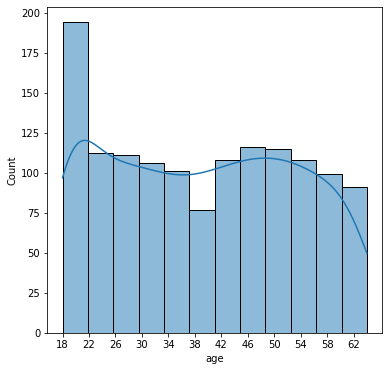

In [17]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x='age',kde=True)
plt.xticks(np.arange(18,65,4))
plt.show()
#The peak of the histogram is for the age range 18-22.

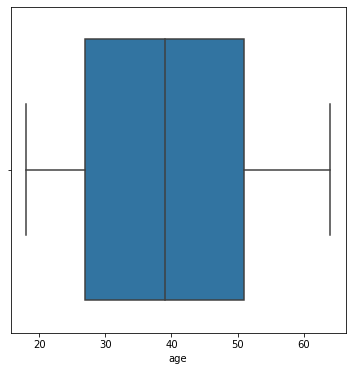

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='age')
plt.show()
#There are no outliers in age column.

- #### "Sex" Column

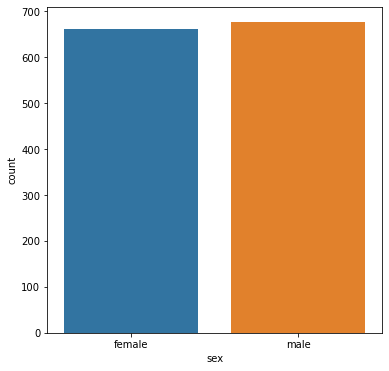

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='sex')
plt.show()
#The number of male and female are almost same.

In [20]:
df['sex'].value_counts(normalize=True)
#The number of male and female are almost same.

male      0.505232
female    0.494768
Name: sex, dtype: float64

- #### "Smoker" Column

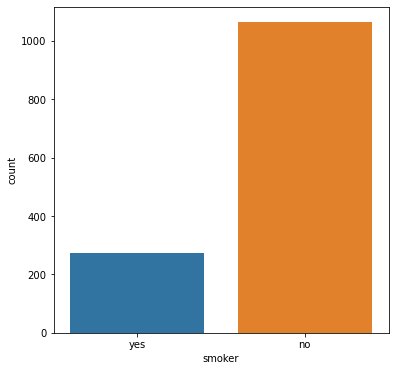

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='smoker')
plt.show()
#The number of non-smokers are quite a lot in comparison to smokers.

In [22]:
df['smoker'].value_counts(normalize=True)
#The ratio of non-smokers to smokers is 4:1.

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

- #### "Region" Column

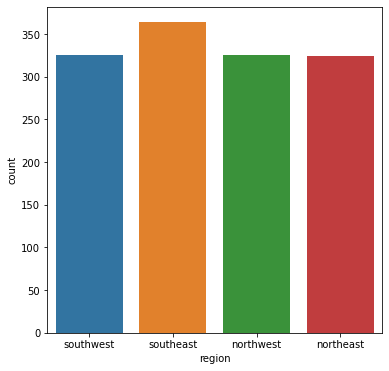

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='region')
plt.show()
#The number of people in the 4 regions are almost the same.

In [24]:
df['region'].value_counts(normalize=True)
#The number of people in the 4 regions are almost the same.

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

- #### "Viral Load" Column

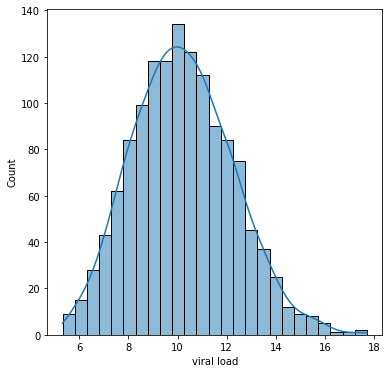

In [25]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x='viral load',kde=True)
plt.show()
#Viral Load data look like a bell shaped curve but is a slightly right skewed.

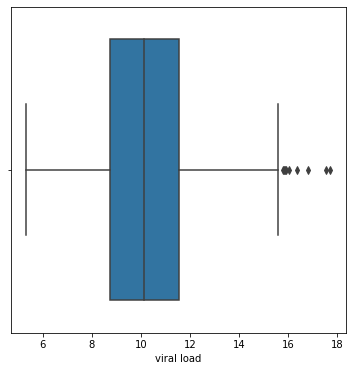

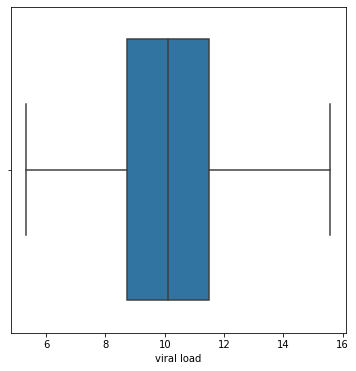

In [26]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='viral load')
plt.show()
#There are outliers in Viral Load column. Therefore we need to remove them.

q75,q25=np.percentile(df['viral load'],75),np.percentile(df['viral load'],25)
df=df[df['viral load']<(q75 + (q75-q25)*1.5)]

plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='viral load')
plt.show()
#All the outliers have been removed.

- #### "Severity Level" Column

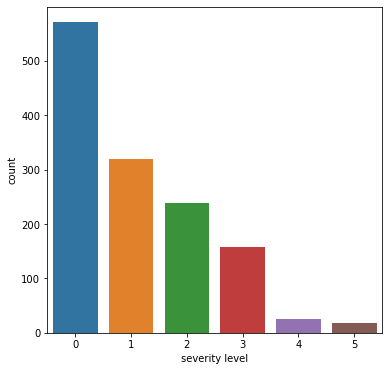

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='severity level')
plt.show()
#We can observe that lesser the severity, more the number of people are there in the given dataset.

In [28]:
df['severity level'].value_counts(normalize=True)
#We can observe that lesser the severity, more the number of people are there in the given dataset..

0    0.429646
1    0.240783
2    0.179082
3    0.118134
4    0.018811
5    0.013544
Name: severity level, dtype: float64

- #### "Hospitalization Charges" Column

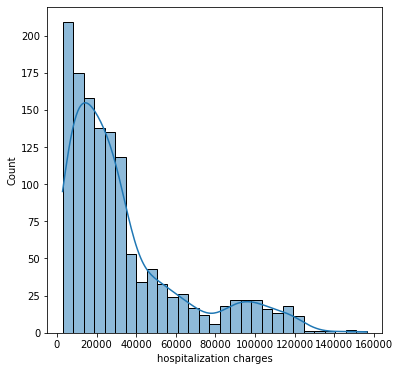

In [29]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x='hospitalization charges',kde=True)
plt.show()
#Hospitalization charges data is right skewed.

## Bivariate Analysis

- #### "Age and Hospitalization Charges" Columns

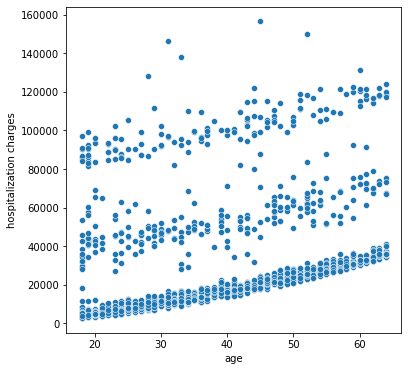

In [30]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='age',y='hospitalization charges')
plt.show()
#We do not see a distinct relationship between age and hospitalization charges.
#For a single value of age, there are multiple values of hospitalization charges.

- #### "Sex and Hospitalization Charges" Columns

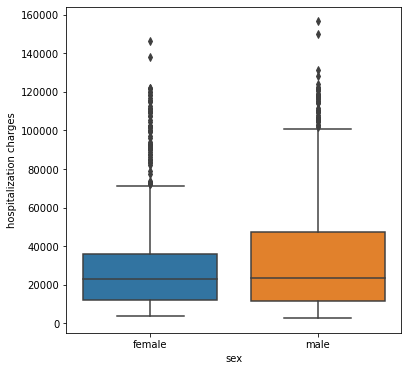

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='sex',y='hospitalization charges')
plt.show()
#We observe that there the median hospitalization charges are almost same for both male and female.
#There are a few outliers both for male and female.

- #### "Smoker and Hospitalization Charges" Columns

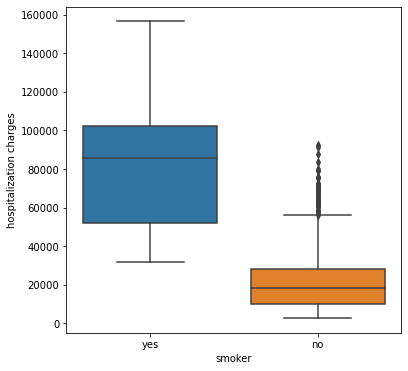

In [32]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='smoker',y='hospitalization charges')
plt.show()
#We observe that there the median hospitalization charges is a lot greater for smokers in comparison to non smokers.
#However there are a few outliers for non-smokers.

- #### "Region and Hospitalization Charges" Columns

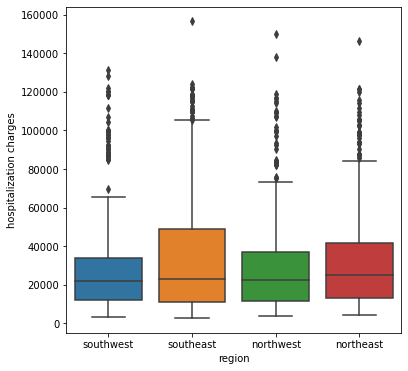

In [33]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='region',y='hospitalization charges')
plt.show()
#We observe that there the median hospitalization charges are almost same for the different regions.
#There are a few outliers for all the regions.

- #### "Viral Load and Hospitalization Charges" Columns

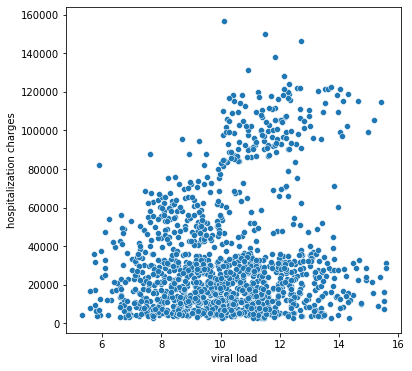

In [34]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='viral load',y='hospitalization charges')
plt.show()
#We do not see a distinct relationship between viral load and hospitalization charges.

- #### "Severity Level and Hospitalization Charges" Columns

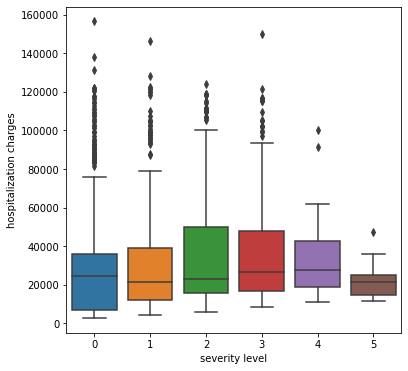

In [35]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='severity level',y='hospitalization charges')
plt.show()
#We observe that the median hospitalization charges are almost same for severity levels.

- #### "Sex and Smoker" Columns

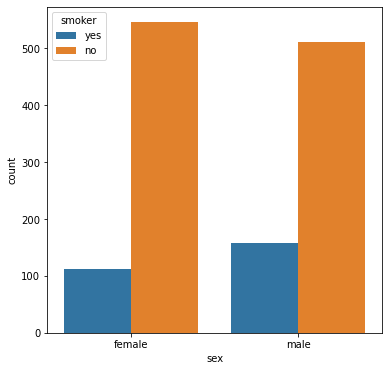

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='sex',hue='smoker')
plt.show()
#We observe that irrespective of the gender, there are more non-smokers in comparison to smokers.

In [37]:
pd.crosstab(df['sex'],df['smoker'],normalize='index')
#We observe that irrespective of the gender, there are more non-smokers in comparison to smokers.

smoker,no,yes
sex,,
female,0.828528,0.171472
male,0.764179,0.235821


- #### "Severity Level and Smoker" Columns

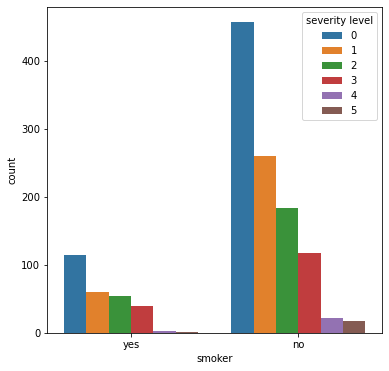

In [38]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='smoker',hue='severity level')
plt.show()
#We observe that irrepective of smoker status, the order of the severity level is the same for both smokers and non smokers.

In [39]:
pd.crosstab(df['smoker'],df['severity level'],normalize='index')
#We observe that irrepective of smoker status, the order of the severity level is the same for both smokers and non smokers.

severity level,0,1,2,3,4,5
smoker,,,,,,
no,0.431947,0.245747,0.173913,0.111531,0.020794,0.016068
yes,0.420664,0.221402,0.199262,0.143911,0.011070,0.003690


- #### "Age and Smoker" Column

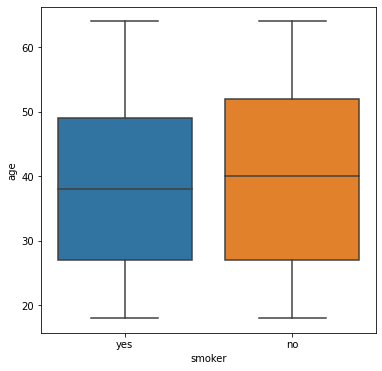

In [40]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='smoker',y='age')
plt.show()
#We observe that non-smokers have a greater median age than smokers.

- #### "Age and Viral Load" Column

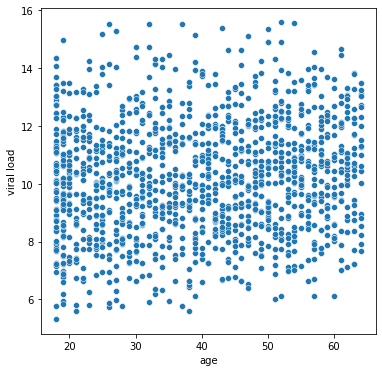

In [41]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='age',y='viral load')
plt.show()
# We do not see any distinct relationship between age and viral load.

- #### "Sex and Viral Load" Column

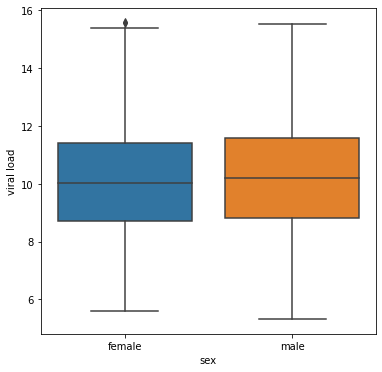

In [42]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='sex',y='viral load')
plt.show()
#We observe that the viral load for male and female is almost same.

- #### "Smoker and Viral Load" Column

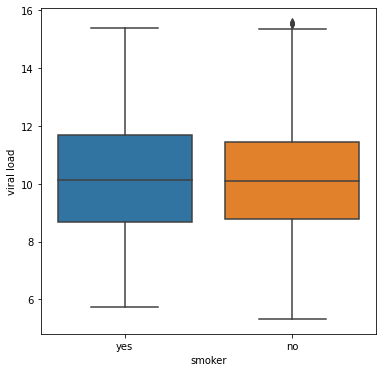

In [43]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='smoker',y='viral load')
plt.show()
#We observe that the viral load for smokers and non-smokers is almost same.

- #### "Region and Viral Load" Column

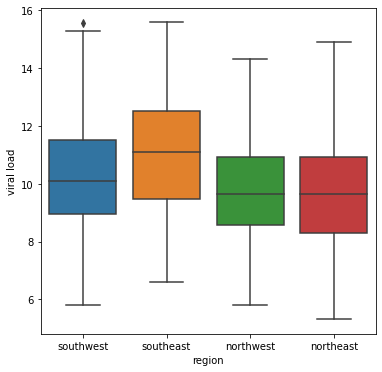

In [44]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='region',y='viral load')
plt.show()
#We observe the median viral load is almost same for all the regions except southeast which has higher median viral load.

- #### "Region and Smoker" Column

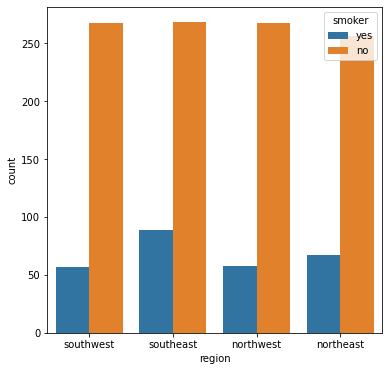

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='region',hue='smoker')
plt.show()
#We observe that irrespective of the region, there are more non-smokers in comparison to smokers.

In [46]:
pd.crosstab(df['region'],df['smoker'],normalize='index')
#We observe that irrespective of the region, there are more non-smokers in comparison to smokers.

smoker,no,yes
region,,
northeast,0.792570,0.207430
northwest,0.821538,0.178462
southeast,0.750700,0.249300
southwest,0.824074,0.175926


- #### "Severity Level and Viral Load" Column

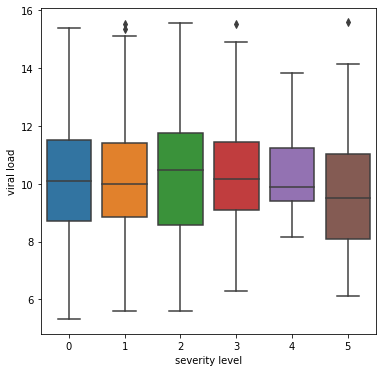

In [47]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='severity level',y='viral load')
plt.show()
#We observe that irrespective of the severity level, the median viral load is almost same.

## Hypothesis Testing

### 1) Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't?


In [48]:
#Lets check the different categories of smoker column
df['smoker'].unique().tolist()

['yes', 'no']

In [49]:
#Lets segregate the two datasets
smoker_yes = df.loc[df['smoker']=='yes','hospitalization charges']
smoker_no = df.loc[df['smoker']=='no','hospitalization charges']

In [50]:
#Lets check the length of both datasets.
print(len(smoker_yes),len(smoker_no))

271 1058


- #### We can perform a 2 sample independent right tailed t-test to verify whether the hospitalization charges of people who do smoking are greater than those who don't do smoking.

#### Lets define our null and alternative hypothesis
- Null Hypothesis : The average hospitalization charges of smokers is less than or equal to the average hospitalization charges of non-smokers, which can be represented as : Mean Hospitalization charges(Smokers) <= Mean Hospitalization charges(Smokers).
    
- Alternative Hypothesis : The average hospitalization charges of smokers is greater than the average hospitalization charges of non-smokers, which can be represented as : Mean Hospitalization charges(Smokers) > Mean Hospitalization charges(Smokers).

### Assumptions:
- Population mean and sigma are finite.
- Observations are random and finite.

In [51]:
alpha = 0.05
t_value,p_value=stats.ttest_ind(smoker_yes,smoker_no,alternative='greater')
print('p-value for two tailed test is {}'.format(p_value))
print()

if p_value<=alpha:
    print('Conclusion - Since p-value({}) <= alpha({})'.format(p_value,alpha))
    print('We reject the null hypothesis H0.')
    print('We can conclude mean hospitalization charges of smokers is greater than non-smokers')

else:
    print('Conclusion - Since p-value({}) > alpha({})'.format(p_value,alpha))
    print('We cannot reject the null hypothesis H0.')
    print('We cannot conclude mean hospitalization charges of smokers is greater than non-smokers')

p-value for two tailed test is 1.2623407061825943e-279

Conclusion - Since p-value(1.2623407061825943e-279) <= alpha(0.05)
We reject the null hypothesis H0.
We can conclude mean hospitalization charges of smokers is greater than non-smokers


### 2) Prove (or disprove) with statistical evidence that the viral load of females is different from that of males.


In [52]:
#Lets check the different categories of sex
df['sex'].unique().tolist()

['female', 'male']

In [53]:
#Lets segregate the two datasets
male_viral_load = df.loc[df['sex']=='male','viral load']
female_viral_load = df.loc[df['sex']=='female','viral load']

In [54]:
#Lets check the length of both datasets.
print(len(male_viral_load),len(female_viral_load))

670 659


- #### We can perform a 2 sample independent 2-tailed t-test to verify whether the viral load of females is different from viral load of males.

#### Lets define our null and alternative hypothesis
- Null Hypothesis : The average viral load of females is same as average viral load of males, which can be represented as : Mean Viral Load(Males) = Mean Viral Load(Females).
    
- Alternative Hypothesis : The average viral load of females is different from average viral load of males, which can be represented as : Mean Viral Load(Males) != Mean Viral Load(Females).

### Assumptions:
- Population mean and sigma are finite.
- Observations are random and finite.

In [55]:
alpha = 0.05
t_value,p_value=stats.ttest_ind(male_viral_load,female_viral_load)
print('p-value for two tailed test is {}'.format(p_value))
print()

if p_value<=alpha:
    print('Conclusion - Since p-value({}) <= alpha({})'.format(p_value,alpha))
    print('We reject the null hypothesis H0.')
    print('We can conclude mean female viral load is not equal to mean male viral load')

else:
    print('Conclusion - Since p-value({}) > alpha({})'.format(p_value,alpha))
    print('We cannot reject the null hypothesis H0.')
    print('We cannot conclude mean female viral load is not equal to mean male viral load')

p-value for two tailed test is 0.1457083485811941

Conclusion - Since p-value(0.1457083485811941) > alpha(0.05)
We cannot reject the null hypothesis H0.
We cannot conclude mean female viral load is not equal to mean male viral load


### 3) Is the proportion of smoking significantly different across different regions?

In [56]:
#Lets check the different categories of smoker column
df['smoker'].unique().tolist()

['yes', 'no']

In [57]:
#Lets check the different categories of region column
df['region'].unique().tolist()

['southwest', 'southeast', 'northwest', 'northeast']

- #### We can perform Chi-Square test to determine whether proportion of smoking is significantly different across different regions.
#### Lets define our null and alternative hypothesis
- Null Hypothesis : Region has no effect on Smoker : Region and Smoker are independent of each other.
- Alternative Hypothesis : Region has effect on Smoker : Region and Smoker are dependent on each other.

### Assumptions:
- Since it is a non-parametric test, therefore there is no assumption about the population.

In [58]:
alpha = 0.05
stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['smoker'],df['region']))
print('p-value for two tailed test is {}'.format(p_value))
print()

if p_value<=alpha:
    print('Conclusion - Since p-value({}) <= alpha({})'.format(p_value,alpha))
    print('We reject the null hypothesis H0.')
    print('So we can conclude that Region and Smoker are dependent on each other.')

else:
    print('Conclusion - Since p-value({}) > alpha({})'.format(p_value,alpha))
    print('We cannot reject the null hypothesis H0.')
    print('So we cannot conclude that Region and Smoker are dependent on each other.')

p-value for two tailed test is 0.05978076201764091

Conclusion - Since p-value(0.05978076201764091) > alpha(0.05)
We cannot reject the null hypothesis H0.
So we cannot conclude that Region and Smoker are dependent on each other.


### 4) Is the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence.

In [59]:
#Lets segregate the three datasets
female_severity_level_0 = df.loc[(df['sex']=='female') & (df['severity level']==0),'viral load']
female_severity_level_1 = df.loc[(df['sex']=='female') & (df['severity level']==1),'viral load']
female_severity_level_2 = df.loc[(df['sex']=='female') & (df['severity level']==2),'viral load']

In [60]:
#Lets check the length of three datasets.
print(len(female_severity_level_0),len(female_severity_level_1),len(female_severity_level_2))

288 158 117


- #### We can perform a One-Way ANOVA test to verify whether the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level the same or different, since the no. of categories are more than 2.
#### Lets define our null and alternative hypothesis
- Null Hypothesis : The mean viral load of females with different severity level is same, which can be represented as : There is no difference between the mean number viral load for females for different severity level categories.
- Alternative Hypothesis : The mean viral load of females with different severity level is different, which can be represented as : There is difference between the mean number viral load for females for different severity level categories.

### Assumptions:
- Variance of each group is almost same.
- Observations are random and finite.

In [61]:
#Checking the variances of the three groups.
print(np.std(female_severity_level_0)**2,np.std(female_severity_level_1)**2,np.std(female_severity_level_2)**2)
#They are nearly same. Proceeding with hypothesis testing.

3.8440222499517747 3.6977404262137497 4.353871415004748


In [62]:
alpha = 0.05
f_value, p_value = stats.f_oneway(female_severity_level_0,female_severity_level_1,female_severity_level_2)
print('p-value for two tailed test is {}'.format(p_value))
print()

if p_value<=alpha:
    print('Conclusion - Since p-value({}) <= alpha({})'.format(p_value,alpha))
    print('We reject the null hypothesis H0.')
    print('So we can conclude that there is difference in the mean viral load for different groups.')

else:
    print('Conclusion - Since p-value({}) > alpha({})'.format(p_value,alpha))
    print('We cannot reject the null hypothesis H0.')
    print('So we cannot conclude that there is some difference in the mean viral load for different groups.')

p-value for two tailed test is 0.8894553469550055

Conclusion - Since p-value(0.8894553469550055) > alpha(0.05)
We cannot reject the null hypothesis H0.
So we cannot conclude that there is some difference in the mean viral load for different groups.


## Business Insights

- Patients of all ages from 18 to 64 are present in the dataset.
- Equal percentage of male and female are patients.
- Number of non-smoker is quite a lot in comparison to smokers.
- Patients were admitted from all the 4 regions of the country in almost equal numbers.
- Most patients had viral load in the range of [9-11]
- Most people had severity level 0 followed by severity level 1.
- Hospitalization charges data is right skewed, most people had hospitalization charges less than 40000.
- Gender had no relation with hospitalization charges.
- The mean and median hospitalization charges is far greater for smokers in comparison to non-smokers.
- Region has no impact on hospitalization charges.
- The hospitalization charges for different severity levels is almost same.
- Irrespective of the gender, there are more non-smokers in comparison to smokers.
- Irrespective of smoker status, the order of the severity level is the same for both smokers and non smokers.
- Non-smokers have a greater median age than smokers.
- Viral load for male and female is almost same.
- Viral load for smokers and non-smokers is almost same.
- The median viral load is almost same for all the regions except southeast which has higher median viral load.
- Irrespective of the region, there are more non-smokers in comparison to smokers.
- Irrespective of the severity level, the median viral load is almost same.

## Recommendations

- Smoking is the most important factor on which hospitalization charges is dependent. People who smoke pay more hospitalization charges in comparison to non-smokers. Therfore the hospital should try to look for more patients who are smokers, and try to advertise its medical services for smokers.
- The hospital can appoint employees who provide knowledge about the harmful effects of smoking so that more people can get admitted to cure themselves in the hospital.
- The hospital can give free testing services for smokers to make them realize that they have very bad health, so that they decide to get admitted.
- Since region has no effect on hospitalization charges, therefore the hospital try to look for smokers in every part of the country. Since the proprotion of smokers from every region is almost the same, therefore the hospital can actively look for smokers in any city of the country.
- The hospital should try to look for smokers irrespective of the gender, since gender is not a factor in determining the hospitalization charges.
- Since irrepective of smoker status, the order of the severity level is the same for both smokers and non smokers and the hospitalization charges is also almost same for different severity levels, therefore the hospital can look for patients who have any severity level.
- The median viral load is almost the same irrespective of the gender, smoker status, region and severity level, therefore the hospital can admit patients who have any value of viral load since viral load is not a distinct factor in determining hospitalization charges.